In [1]:
print('17/6/2023')


17/6/2023


### **Predicting the Sale Price of Bulldozers using Machine Learning**


In [1]:
#imports / frameworks / libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# import training and validation sets
dataframe = pd.read_csv('../data/TrainAndValid.csv',
                         low_memory=False)
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
dataframe.head(20)
print(dataframe.isna().sum())

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
dataframe.columns


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [8]:
dataframe.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [9]:
df_tmp = pd.read_csv('../data/TrainAndValid.csv',
                     low_memory=False,
                     parse_dates=['saledate'])

df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df_tmp.sort_values(by=['saledate'], inplace=True, ascending=True)

In [13]:
df_tmp.saledate.head(25)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
238656   1989-01-31
52508    1989-01-31
127923   1989-01-31
127521   1989-01-31
152689   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [15]:
df_tmp = df_tmp.assign(
    saleYear = df_tmp.saledate.dt.year,
    saleMonth = df_tmp.saledate.dt.month,
    saleDay = df_tmp.saledate.dt.day,
    saleDayOfWeek = df_tmp.saledate.dt.day_of_week,
    saleDayOfYear = df_tmp.saledate.dt.dayofyear
)

In [17]:
df_tmp.drop('saledate', axis=1, inplace=True)

In [18]:
df_tmp.head(50).T

,205615,233186,142491,115536,92301,115892,134080,92294,31494,140922,...,231507,169757,92803,75832,88803,75378,169297,280078,140257,128751
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,1725330,1597053,1404019,1364118,1394449,1363540,1596358,1858203,1502329,1477524
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,25000.0,12750.0,24000.0,29000.0,39000.0,22500.0,19000.0,12500.0,35000.0,10000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1538651,1100960,1169900,1303693,1212304,1413842,1433229,1340159,1300019,1078853
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,8948,8180,7110,7267,7001,7267,8247,10727,4155,4103
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,18.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1968,1979,1986,1981,1982,1976,1978,1979,1977,1972
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416,966C,D4H,416,W20,D7G,...,466,510,416,930,215,930,644,510,D9H,D4D


In [20]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [22]:
# save the data
df_tmp.to_csv('../data/currentTrainData.csv', index=False)

In [25]:

current_df = pd.read_csv('../data/currentTrainData.csv',
                         low_memory=False)
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [28]:
current_df.UsageBand.dtype, type(current_df.UsageBand)

(dtype('O'), pandas.core.series.Series)

In [29]:
pd.api.types.is_string_dtype(current_df.UsageBand)

True

### **Find the columns which contain strings**

In [30]:
for label, content in current_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [31]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [32]:
#This will turn all of the string value into category values

for label, content in current_df.items():
    if pd.api.types.is_string_dtype(content):
        current_df[label] = content.astype('category').cat.as_ordered()

In [33]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [39]:
# la clave de usar: .cat.as_ordered()
current_df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [41]:
current_df.state.cat.codes

0         43
1          8
2          8
3          8
4          8
          ..
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

In [43]:
# revisamos missing data
current_df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [44]:
(current_df.isnull().sum() / len(current_df))

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

#### Save the data:

In [45]:
current_df.to_csv('../data/lastData.csv', index=False)

In [1]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

last_df = pd.read_csv('../data/lastData.csv',
                      low_memory=False)
# last_df.head(40).T

### Fill missing values: ->

In [2]:
last_df.saleDay.head()

0    17
1    31
2    31
3    31
4    31
Name: saleDay, dtype: int64

In [3]:
# check numeric columns
for label, content in last_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [4]:
# check null values in numeric columns
for label, content in last_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f'Null values find out in: {label}')

Null values find out in: auctioneerID
Null values find out in: MachineHoursCurrentMeter


In [5]:
print(last_df.auctioneerID.head(500))

0      18.0
1      99.0
2      99.0
3      99.0
4      99.0
       ... 
495     4.0
496     4.0
497     4.0
498     4.0
499     4.0
Name: auctioneerID, Length: 500, dtype: float64


In [6]:
# fill numeric rows with the median

for label, content in last_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            last_df[label+'_is_missing'] = pd.isnull(content)
            last_df[label] = content.fillna(content.median())

In [7]:
last_df.head(33).T

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,1475526,1531383,1380746,1371695,1328950,1449641,1449754,1259842,1595295,1453139
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,23500.0,72000.0,81000.0,28000.0,19000.0,11750.0,11000.0,9000.0,16000.0,37000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1111869,1315503,805541,1444477,1444418,492948,1486544,1226323,1291243,1456099
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,7277,1035,4128,1571,4089,3356,3356,6788,8298,3854
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,18.0,18.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1972,1986,1987,1982,1983,1966,1967,1978,1977,1978
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416,966C,D4H,416,W20,D7G,...,950,215CLC,D6H,D5BLGP,D3B,12F,12F,580,750,966C


In [8]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [9]:
# Check if there's any null numeric values
for label, content in last_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [10]:
# check how to see how many examples were missing
last_df.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [11]:
last_df.MachineHoursCurrentMeter_is_missing.value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

In [12]:
last_df.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [13]:
# Check for  columns which aren't numeric
for label, content in last_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label) 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [14]:
# Turn categorical values into numbers and fill missing
for label, content in last_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        last_df[label+"_is_missing"] = pd.isnull(content)
        last_df[label] = pd.Categorical(content).codes+1

In [26]:
pd.Categorical(last_df["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [22]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [27]:
last_df.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [ ]:
#Now that all of data is numeric as well as our dataframe has no missing values, 
#we should be able to build a machine learning model.

In [28]:
last_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
2,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
3,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
4,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


In [30]:
# save the data:

last_df.to_csv("../data/ml_data.csv", 
               index=False)


In [1]:
#import tha data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ml_data = pd.read_csv("../data/ml_data.csv",
                      low_memory=False,
                      )
# ml_data.head()

In [2]:
# split data into training and validation
df_val = ml_data[ml_data.saleYear == 2012]
df_train = ml_data[ml_data.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [3]:
# split data into x, y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [4]:
y_train

0          9500.0
1         30000.0
2         21000.0
3         33000.0
4         24000.0
           ...   
401120    34500.0
401121    19000.0
401122    24000.0
401123    18000.0
401124    24000.0
Name: SalePrice, Length: 401125, dtype: float64

In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [5]:
# Building a evaluation function

# funcion creada desde 0, porque Sklearn no la tiene incorporada:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    # Root mean squared log error between preds and true labels

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    scores = {

        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Validation MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Validation RMSLE": rmsle(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Validation R^2": r2_score(y_valid, val_preds)
    }

    return scores


In [6]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: user 26.9 s, sys: 845 ms, total: 27.8 s
Wall time: 3min 11s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [7]:
show_scores(model)

{'Training MAE': 5548.995840324089,
 'Validation MAE': 7179.6961392897265,
 'Training RMSLE': 0.25737726780537257,
 'Validation RMSLE': 0.29404344200903443,
 'Training R^2': 0.8610738743845616,
 'Validation R^2': 0.8320179198265638}

##### Hyperparameter tuning with RandomizedSearchCV

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {

    "n_estimators": np.arange(10, 100, 10),       
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

# instantiate RSCV model:

randomized_search_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                                   random_state=42),
    param_distributions=rf_grid,
    n_iter=2,
    cv=5,
    verbose=True
)

randomized_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/home/fpicado/Documents/Machine-Learning-Workspace/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/fpicado/Documents/Machine-Learning-Workspace/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/fpicado/Documents/Machine-Learning-Workspace/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the p

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [9]:
randomized_search_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

**Train a model with the best hyperparamters    
*Note: These were found after 100 iterations of RandomizedSearchCV.***

In [10]:
# ideal hyperparameters

ideal_model = RandomForestRegressor(

    n_jobs=-1,
    n_estimators=40,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    max_samples=None,
    random_state=42

)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [11]:
show_scores(ideal_model)

{'Training MAE': 2956.488700011005,
 'Validation MAE': 5957.457704159022,
 'Training RMSLE': 0.14448478225577732,
 'Validation RMSLE': 0.24544663828024388,
 'Training R^2': 0.9587936671021189,
 'Validation R^2': 0.8820814857765893}

In [12]:
#  Make predictions on test data
# Import test data:

df_test = pd.read_csv('../data/Test.csv', low_memory=False, parse_dates=["saledate"])
df_test.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [15]:
# Preprocessing the data (getting the test dataset in the same format as our training dataset)

def preprocess_data(df):
    #Performs transformations on df and returns transformed df.
    df = df.assign(
        saleYear = df.saledate.dt.year,
        saleMonth = df.saledate.dt.month,
        saleDay = df.saledate.dt.day,
        saleDayOfWeek = df.saledate.dt.dayofweek,
        saleDayOfYear = df.saledate.dt.dayofyear
    )

    df.drop("saledate", axis=1, inplace=True)

    # fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [16]:
# Process the test data

df_test = preprocess_data(df_test)

In [17]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [18]:
# df_test tiene menos columns que X_train, aun no podemos hacer predictions, revisamos:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [19]:
# agregamos lo faltante:
df_test["auctioneerID_is_missing"] = False

In [31]:
# Se deben ordenar las columnas en el mismo orden, de lo contrario hay error
df_test = df_test[X_train.columns.tolist()]

In [32]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [35]:
len(test_preds), test_preds

(12457,
 array([18407.76877107, 17676.91665953, 47666.68478065, ...,
        13626.06566752, 16642.22103426, 27088.57641861]))

We've made some predictions but they're not in the same format Kaggle is asking for:    https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [41]:
# Format predictions:
df_preds = pd.DataFrame()

df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,18407.768771
1,1227844,17676.916660
2,1227847,47666.684781
3,1227848,66452.051240
4,1227863,53670.309859


In [46]:
# Export prediction data
df_preds.to_csv("../data//test_predictions.csv", index=False)

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [42]:
# feature importance:
ideal_model.feature_importances_

array([3.15414823e-02, 1.99479809e-02, 4.54712559e-02, 1.90514307e-03,
       3.40436007e-03, 2.03055338e-01, 3.20937511e-03, 9.80203151e-04,
       4.03804074e-02, 4.09729014e-02, 6.07614597e-02, 4.53352387e-03,
       1.65881480e-02, 1.56632161e-01, 4.51592711e-02, 5.92951020e-03,
       2.17647288e-03, 4.89432486e-03, 3.33540585e-03, 6.05718935e-02,
       5.18390347e-04, 5.14462344e-05, 8.33786888e-04, 1.98674292e-04,
       1.01490464e-03, 2.41532133e-05, 6.14887534e-03, 8.96349014e-03,
       2.67536372e-03, 1.67263555e-04, 5.80998016e-03, 3.68398035e-03,
       4.56685713e-03, 2.99838744e-03, 3.00346844e-04, 4.22237672e-03,
       8.83925334e-04, 1.85417888e-02, 7.58409741e-04, 2.36577120e-03,
       9.38522565e-04, 8.50062978e-04, 2.53147871e-03, 5.92189591e-04,
       5.23013441e-04, 3.64473747e-04, 3.90509324e-04, 1.60955258e-03,
       9.86169971e-04, 2.37251098e-04, 3.03409289e-04, 7.37648620e-02,
       3.77698559e-03, 5.71902807e-03, 2.90512974e-03, 9.83078391e-03,
      

Difficult to read, so...

In [43]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

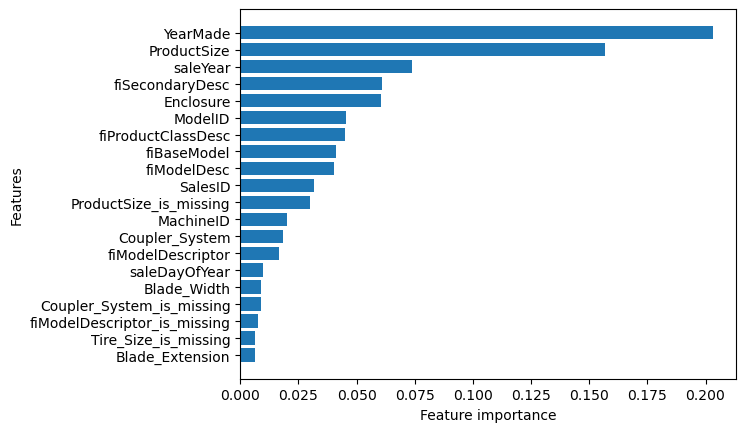

In [44]:
plot_features(X_train.columns, ideal_model.feature_importances_)